In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
import Combo_Functions
import random

In [3]:
#Loading the Data
os.chdir('E:\Academics\Research\Data\Experimental data\Compression_test\Analysis\Input')
Data = pd.read_csv('Yield_Iteration2.csv')


In [52]:
#Properties
Properties = ['Youngs_Modulus', 'Yield_Strength','Ultimate_Strength','Ductility']
Property = Properties[1]

In [53]:
#Splitting into Training and Test Data
Training_Data = Data[Data[Property].notnull()]
Test_Data = Data.drop(Data.columns[-1], axis=1)

In [54]:
# Generating random values from the normal distribution
a = np.random.normal(loc = np.mean(Training_Data[Property]),
                     scale = np.std(Training_Data[Property]),
                     size = 625)


In [55]:
ind = np.asarray(Test_Data.index)
ind = np.random.permutation(ind)

In [56]:
g = 0 
h = 25
avg_std_dev = []
max_std_dev = []

In [57]:
#Generate divisors of a number
def divisorGenerator(n):
    large_divisors = []
    for i in xrange(1, int(math.sqrt(n) + 1)):
        if n % i == 0:
            yield i
            if i*i != n:
                large_divisors.append(n / i)
    for divisor in reversed(large_divisors):
        yield divisor

In [58]:
def blockPrint():
    sys.stdout = open(os.devnull, 'w')

# Restore
def enablePrint():
    sys.stdout = sys.__stdout__

In [59]:
Data[Property][ind[g:h]] = a[g:h]

C:\Users\senth\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [60]:
for i in range((len(a)/25)-1):
    Data[Property][ind[g:h]] = a[g:h]
    
    subs = np.array(np.split(b[:36], 6))
    iterations = []
    training_indices = np.concatenate(subs[j])
    testing_indices = subs[i]

    # create data subsets
    iteration.train = Data[training_indices]
    iteration.test = Data[testing_indices]
    
    
    
    j = range(6)
    del j[i]
    training_indices = np.concatenate(subs[j])
    testing_indices = subs[i]
    
    Temp_Training_Data = Data[Data[Property].notnull()]
    Temp_Test_Data = Data[~Data[Property].notnull()].dropna(axis = 1)
    blockPrint()
    Temp_Results = Combo_Functions.Predict(Temp_Training_Data,Temp_Test_Data)
    avg_std_dev.append(np.mean(Temp_Results['Predicted_Sdev']))
    max_std_dev.append(np.max(Temp_Results['Predicted_Sdev']))
    g = g+25
    h = h+25

C:\Users\senth\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


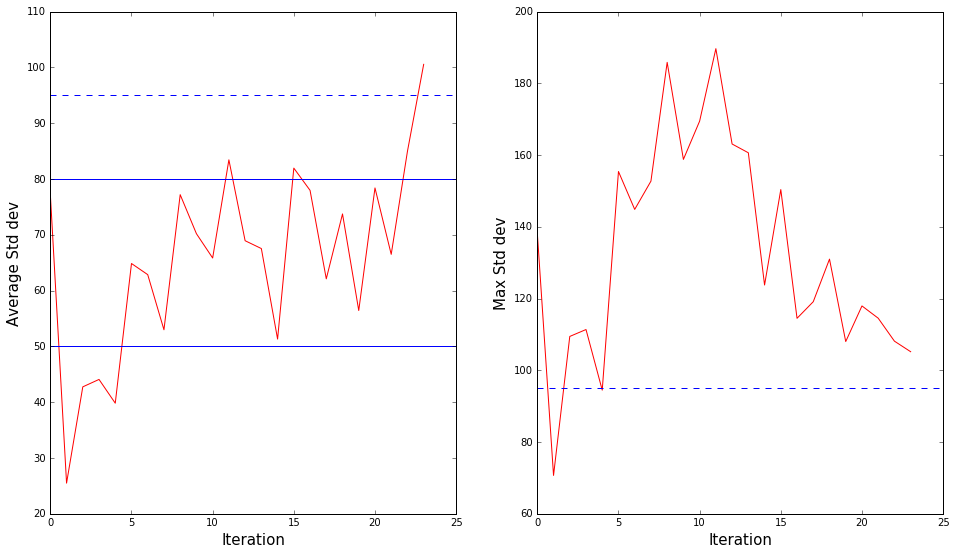

In [64]:
# plot your results
fig = plt.figure(figsize=(16,9))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)


ax1.plot(avg_std_dev,'r-')
ax1.set_xlabel('Iteration',size = 15)
ax1.set_ylabel('Average Std dev', size = 15)
ax1.axhline(sigma, linestyle='--')
ax1.axhline(50, linestyle = '-')
ax1.axhline(80, linestyle = '-')

ax2.plot(max_std_dev,'r-')
ax2.set_xlabel('Iteration', size = 15)
ax2.set_ylabel('Max Std dev', size = 15)
ax2.axhline(sigma, linestyle='--')



In [62]:
len(Temp_Training_Data)

603

In [63]:
len(Temp_Test_Data)

22